In [1]:
import numpy as np
import pandas as pd
%matplotlib inline  
# La línea anterior se necesita en jupyter al usar matplotlib
import matplotlib.pyplot as plt

from housing_cleaning import * # Esto es un archivo donde he puesto las funciones que vamos usando

In [2]:
#df = pd.read_csv(r"./train.csv")
#df.head()

In [3]:
df = pd.read_csv("all/train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.values.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Vamos a empezar por ver si alguna de esas 81 columnas está llena de NAs, como parece que le pasa a Alley, PoolQC, etc.

Las columnas problemáticas son:

In [7]:
nas = df.isnull().any()
nas.index[nas == True]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
df[list(nas.index[nas == True])]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
5,85.0,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,1993.0,Unf,TA,TA,NaN,MnPrv,Shed
6,75.0,NaN,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Attchd,2004.0,RFn,TA,TA,NaN,NaN,NaN
7,NaN,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Attchd,1973.0,RFn,TA,TA,NaN,NaN,Shed
8,51.0,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,TA,Detchd,1931.0,Unf,Fa,TA,NaN,NaN,NaN
9,50.0,NaN,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,TA,Attchd,1939.0,RFn,Gd,TA,NaN,NaN,NaN


In [9]:
prop_nas = proporcion_nas(df) # Función sacada del archivo housing_cleaning.py
prop_nas

,Proporcion_NAs,Num_NAs
Electrical,0.000685,1
MasVnrType,0.005479,8
MasVnrArea,0.005479,8
BsmtQual,0.025342,37
BsmtCond,0.025342,37
BsmtFinType1,0.025342,37
BsmtExposure,0.026027,38
BsmtFinType2,0.026027,38
GarageCond,0.055479,81
GarageQual,0.055479,81


Hay 5 columnas en las que más de 1/5 de las observaciones son NAs.

Vamos variable por variable a ver qué son y por qué puede haber tantos NAs. Está en la descripción del dataset ("data_description.txt"). En realidad, muchos NAs en realidad son datos (por ejemplo, si una vivienda no tiene garaje, ponen NA en la variable GarageType).

NOTA: Muchas variables del dataset dicen "Above Grade". Significa que están por encima del nivel del suelo, es decir, no son sótano. http://www.gimme-shelter.com/above-grade-50066/

+ LotFrontage: Linear feet of street connected to property      ["Frontage" es fachada. Entiendo que es una medida de cuánto espacio hay frente a la casa].

+ Alley: Type of alley access to property [El camino que lleva a la casa: si lo hay y si es pavimentado o de gravilla].

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
+ MasVnrType: Masonry veneer type [Si el recubrimiento de la fachada es de ladrillo, de piedra, etc. Entiendo que **None** es que no tiene recubrimiento, y que los **NAs** que aparecen son datos que de verdad faltan. Por suerte son solo un 0.5% de las observaciones.]

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
+ MasVnrArea: Masonry veneer area in square feet

+ BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement
		
+ BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
+ BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
+ BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

+ BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

+ Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed		

+ FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
+ GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
+ GarageYrBlt: Year garage was built
		
+ GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
+ GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
+ GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
+ PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
+ Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
+ MiscFeature: Miscellaneous feature not covered in other categories
 		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

Todas las variables tienen NAs falsos excepto:
+ LotFrontage
+ MasVnrType y MasVnrArea
+ Electrical

LotFrontage es problemática porque "solo" tiene un 18% de NAs y sería una pena tirar esa columna a pesar de que tiene info potencialmente útil.
MasVnrType y MasVnrArea tienen muy, muy pocos NAs reales (apenas 8 observaciones), por lo que podríamos eliminar esas filas y listo.
Lo mismo le pasa a Electrical, que solo le falta una observación.

En ciertos algoritmos como Random Forest se necesita que no haya NaNs, así que vamos a cambiar los NAs falsos por algún string tipo "Sin Garaje", "Sin Chimenea", etc. Después podemos decidir qué hacer con LotFrontage y eliminar las 9 observaciones problemáticas al usar estos algoritmos. 

In [10]:
cols_nas_falsos = df.isnull().any()
cols_nas_falsos = list(cols_nas_falsos.index[nas == True])

cols_nas_falsos.remove("LotFrontage")
cols_nas_falsos.remove("MasVnrType")
cols_nas_falsos.remove("MasVnrArea")
cols_nas_falsos.remove("Electrical")
cols_nas_falsos # Esto ya está guardado en el archivo housing_cleaning.py. He dejado este bloque para que se entienda el proceso

['Alley',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [11]:
df[cols_nas_falsos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
Alley           91 non-null object
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(1), object(14)
memory usage: 171.2+ KB


La variable GarageYrBlt es el año en que se construyó el garaje. Tiene NaN cuando no hay garaje. Para arreglar eso podríamos convertir el año a string y poner "No Garage" donde los NaNs. Pero perdemos la info de que los años están ordenados. Otra opción sería imputarles una fecha de construcción ficticia y anterior a todos los demás años (por ejemplo decir que el garaje [que no existe] se construyó en el 1800). Es un poco chapuza pero creo que es mejor. Vamos a ver cuál es el año de construcción más bajo para saber qué año podríamos ponerle.

In [12]:
df.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Es sospechoso que haya garajes construidos en el 1900 cuando el 75% de los años son mayores que 1961. Hagamos el histograma.

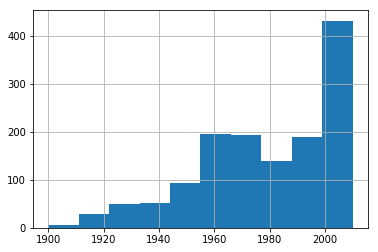

In [13]:
df.GarageYrBlt.hist()

No hay ningún pico en 1900, así que no es que haya un tope en 1900 ni que se hayan inventado el dato poniendo 1900 cuando no saben. Realmente hay garajes del 1900. Podríamos imputar entonces que los garajes que no existen se construyeron en el 1850. 

**NOTA**: A Rocío eso le parece una guarrería. Me ha dicho que probemos dos cosas y comparemos cuál es mejor:
+ Opción 1. Hacer dos dataframes: uno para las casas que tienen garaje y otro para las que no y después juntar las predicciones hechas para uno y para otro.
+ Opción 2. Eliminar la columna sin más.

Una vez hecho eso podríamos mirar si eso de imputar el año 1850 es tanta guarrería. El problema obvio que tiene es que el año que se elija va a afectar al minmaxscaler y al estandarizar. La de convertir a strings es muy parecida: al final lo que vamos a hacer (nosotros o el propio sklearn) es convertirlo a números, solo que en ese caso va a entender que hay tanta distancia desde el nan al 1900 como del 1900 al 1901, que es como imputar 1899 a los nans. Ya habrá tiempo de mirar esto. De momento le hago caso a Rocío y dejo los nans.

In [14]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
df2 = corrige_nas_falsos(df)
df2[cols_nas_falsos]

,Alley,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,No Alley Access,Gd,TA,No,GLQ,Unf,No Fireplace,Attchd,2003.0,RFn,TA,TA,No Pool,No Fence,No Misc
1,No Alley Access,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA,No Pool,No Fence,No Misc
2,No Alley Access,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA,No Pool,No Fence,No Misc
3,No Alley Access,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA,No Pool,No Fence,No Misc
4,No Alley Access,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA,No Pool,No Fence,No Misc
5,No Alley Access,Gd,TA,No,GLQ,Unf,No Fireplace,Attchd,1993.0,Unf,TA,TA,No Pool,MnPrv,Shed
6,No Alley Access,Ex,TA,Av,GLQ,Unf,Gd,Attchd,2004.0,RFn,TA,TA,No Pool,No Fence,No Misc
7,No Alley Access,Gd,TA,Mn,ALQ,BLQ,TA,Attchd,1973.0,RFn,TA,TA,No Pool,No Fence,Shed
8,No Alley Access,TA,TA,No,Unf,Unf,TA,Detchd,1931.0,Unf,Fa,TA,No Pool,No Fence,No Misc
9,No Alley Access,TA,TA,No,GLQ,Unf,TA,Attchd,1939.0,RFn,Gd,TA,No Pool,No Fence,No Misc


En principio con eso está todo listo. Antes todas estas transformaciones las hacía en el propio notebook, pero las he pasado a al archivo ``housing_cleaning.py`` por dos razones:
+ 1. Vamos a tener que hacer lo mismo para el test set
+ 2. Si esto fuera un proyecto real es posible que recibiésemos nuevos datos a menudo y habría que hacer estas operaciones tal vez a diario.

# Exploración de datos (o "Intento de")

Hagamos un histograma de cada variable.

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


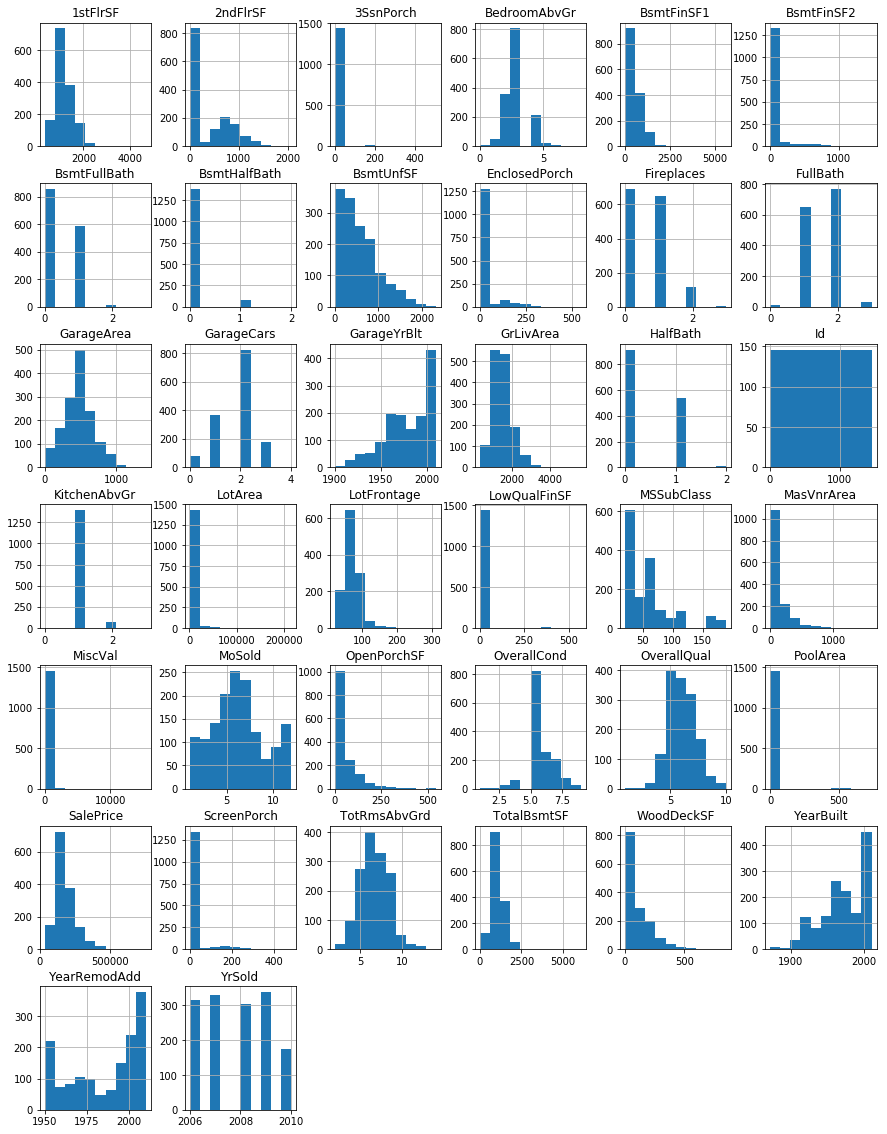

In [16]:
%matplotlib inline

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

plt.show()

Vamos a ver los estadísticos descriptivos de cada variable numérica. Por tenerlos para luego más que nada.

In [17]:
df.iloc[:,:34].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


In [18]:
df.iloc[:,34:49].describe()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000


In [19]:
df.iloc[:,49:67].describe()

,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521
std,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000
50%,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000
75%,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000
max,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000


In [20]:
df.iloc[:,67:].describe()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Vamos a ver también la correlación de las variables. Para ello primero ponemos la variable objetivo (SalePrice) en primer lugar.

In [21]:
col_list = list(df)
col_list[0], col_list[-1] = col_list[-1], col_list[0]
df = df[col_list]

In [22]:
correlaciones = df.corr().sort_values("SalePrice")
correlaciones

,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Id
KitchenAbvGr,-0.135907,0.281721,-0.006069,-0.017784,-0.183882,-0.087001,-0.174800,-0.149598,-0.037610,-0.081007,...,-0.090130,-0.070091,0.037312,-0.024600,-0.051613,-0.014525,0.062341,0.026589,0.031687,0.002951
EnclosedPorch,-0.128578,-0.012037,0.010700,-0.018340,-0.113937,0.070356,-0.387268,-0.193919,-0.110204,-0.102303,...,-0.125989,-0.093079,1.000000,-0.037305,-0.082864,0.054203,0.018361,-0.028887,-0.009916,0.002889
MSSubClass,-0.084284,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.011156
OverallCond,-0.077856,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,0.012609
YrSold,-0.028923,-0.021407,0.007450,-0.014261,-0.027347,0.043950,-0.013618,0.035743,-0.008201,0.014359,...,0.022270,-0.057619,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,0.000712
LowQualFinSF,-0.025606,0.046474,0.038469,0.004779,-0.030429,0.025494,-0.183784,-0.062419,-0.069071,-0.064503,...,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.022174,-0.028921,-0.044230
Id,-0.021917,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,1.000000
MiscVal,-0.021190,-0.007683,0.003368,0.038068,-0.031406,0.068777,-0.034383,-0.010286,-0.029815,0.003571,...,-0.009551,-0.018584,0.018361,0.000354,0.031946,0.029669,1.000000,-0.006495,0.004906,-0.006242
BsmtHalfBath,-0.016844,-0.002333,-0.007234,0.048046,-0.040150,0.117821,-0.038162,-0.012337,0.026673,0.067418,...,0.040161,-0.025324,-0.008555,0.035114,0.032121,0.020025,-0.007367,0.032873,-0.046524,-0.020155
BsmtFinSF2,-0.011378,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.005968


La variable ``OverallQual`` es la que tiene una correlación más fuerte. Es una medida de la calidad del inmueble que probablemente se ha creado usando las demás variables. (Curiosamente, ``OverallCond``, que mide el estado de la casa (más alto es mejor estado) tiene una correlación negativa!)

La segunda es ``GrLivArea``, que parece ser la superficie habitable.

La tercera es el número de coches que caben en el garaje, y la cuarta los metros cuadrados que tiene el garaje. Es obvio que esas dos variables están midiendo más o menos lo mismo y es normal que estén muy correlacionadas. Vamos a verlo.

In [23]:
df[["GarageArea", "GarageCars"]].corr()

,GarageArea,GarageCars
GarageArea,1.000000,0.882475
GarageCars,0.882475,1.000000


Efectivamente, una de estas dos variables es redundante, pero lo dejamos por ahora. 
Vamos a ver cómo se correlaciona la variable ``OverallQual`` con las 10 variables más correlacionadas con ``SalePrice`` (y cómo se correlacionan entre ellas).

In [24]:
df[correlaciones.index[-11:-1]].corr()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
YearRemodAdd,1.000000,0.592855,0.191740,0.439046,0.240379,0.291066,0.371600,0.420622,0.287389,0.550684
YearBuilt,0.592855,1.000000,0.095589,0.468271,0.281986,0.391452,0.478954,0.537850,0.199010,0.572323
TotRmsAbvGrd,0.191740,0.095589,1.000000,0.554784,0.409516,0.285573,0.337822,0.362289,0.825489,0.427452
FullBath,0.439046,0.468271,0.554784,1.000000,0.380637,0.323722,0.405656,0.469672,0.630012,0.550600
1stFlrSF,0.240379,0.281986,0.409516,0.380637,1.000000,0.819530,0.489782,0.439317,0.566024,0.476224
TotalBsmtSF,0.291066,0.391452,0.285573,0.323722,0.819530,1.000000,0.486665,0.434585,0.454868,0.537808
GarageArea,0.371600,0.478954,0.337822,0.405656,0.489782,0.486665,1.000000,0.882475,0.468997,0.562022
GarageCars,0.420622,0.537850,0.362289,0.469672,0.439317,0.434585,0.882475,1.000000,0.467247,0.600671
GrLivArea,0.287389,0.199010,0.825489,0.630012,0.566024,0.454868,0.468997,0.467247,1.000000,0.593007
OverallQual,0.550684,0.572323,0.427452,0.550600,0.476224,0.537808,0.562022,0.600671,0.593007,1.000000


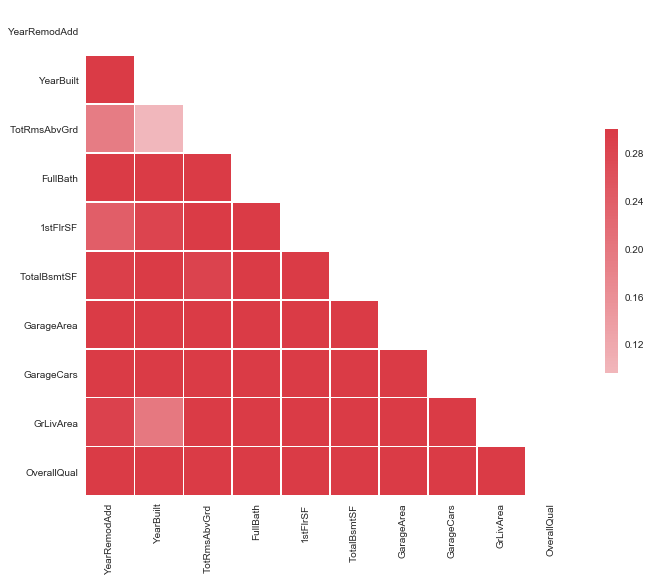

In [25]:
#from biokit.viz import corrplot
#c = corrplot.Corrplot(df[correlaciones.index[-11:-1]].corr())
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 #columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df[correlaciones.index[-11:-1]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

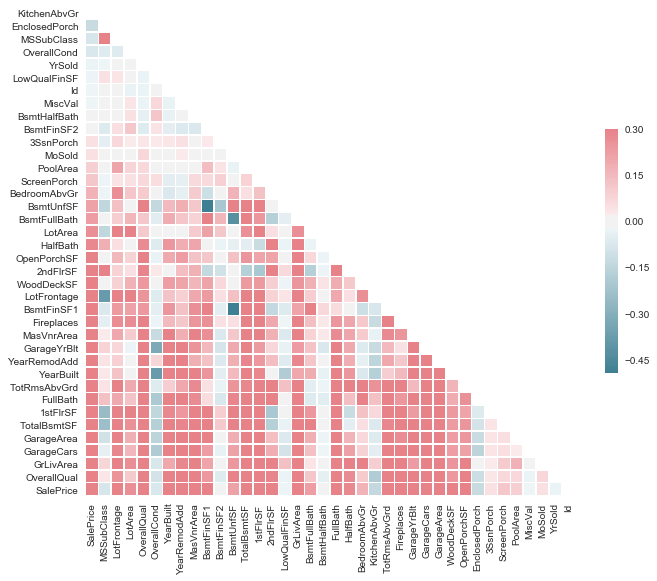

In [26]:
#ahora vamos a hacer el mismo gráfico para todas las variables:

corr = correlaciones

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
figure = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#figure.savefig("correlation_matrix.png")


In [27]:
f.savefig("corr_matrix.png")

La variable ``OverallQual`` está recogiendo mucha info de por sí: el año en el que se reformó, en el que se construyó, el número de habitaciones, de baños completos, el tamaño de la casa, etc. 

Pensemos en qué medidas faltan y pueden ser útiles:

+ El ratio $\frac{\text{número de habitaciones}}{\text{número de baños completos}}$, que parece relevante en cualquier casa. También se puede hacer con el número de baños completos. 
+ El número total de baños. Las variables actualmente distinguen entre baños en el sótano de los baños en el resto de la casa; y entre baños completos e incompletos. Quizá no sirva para nada, pero podemos añadirlo y comprobarlo.
+ Si la casa se ha reformado o no. La variable ``YearRemodAdd`` es el año en que se construyó la casa cuando no ha sido reformada, y el año de la última reforma cuando sí se ha reformado. 
+ Quizá también sea bueno hacer columnas que indiquen solo si hay garaje o no, si hay sótano o no, etc.

Pongo todo esto en la función ``añade_features``. 


In [28]:
df2 = añade_features(df2)
df2.iloc[:40,len(df2.columns)-15:]

,YrSold,SaleType,SaleCondition,SalePrice,TotalBath,TotalFullBath,Bedroom_TotalFullBath,AlleyBool,BsmtBool,FireplaceBool,GarageBool,PoolBool,FenceBool,MiscBool,ReformedBool
0,2008,WD,Normal,208500,4,3,1.000000,1,0,1,0,1,1,1,0
1,2007,WD,Normal,181500,3,2,1.500000,1,0,0,0,1,1,1,0
2,2008,WD,Normal,223500,4,3,1.000000,1,0,0,0,1,1,1,1
3,2006,WD,Abnorml,140000,2,2,1.500000,1,0,0,0,1,1,1,1
4,2008,WD,Normal,250000,4,3,1.333333,1,0,0,0,1,1,1,0
5,2009,WD,Normal,143000,3,2,0.500000,1,0,1,0,1,0,0,1
6,2007,WD,Normal,307000,3,3,1.000000,1,0,0,0,1,1,1,1
7,2009,WD,Normal,200000,4,3,1.000000,1,0,0,0,1,1,0,0
8,2008,WD,Abnorml,129900,2,2,1.000000,1,0,0,0,1,1,1,1
9,2008,WD,Normal,118000,2,2,1.000000,1,0,0,0,1,1,1,1


Con esto en principio ya tenemos un prototipo con el que empezar. Vamos a cambiar a números las columnas tipo string a ``int`` y a estandarizar las variables numéricas (a algunos algoritmos ML no les va bien que las variables tengan magnitudes muy diferentes). 

In [29]:
selec_no_numeric(df).dtypes # Otra función de housing_cleaning.py. Devuelve un df con columnas no numéricas

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

Vamos a factorizar esas variables string. 
Primero vamos a mirar cómo son para saber si tienen un orden concreto. Si lo tienen, es mejor respetarlo a la hora de convertirlo a números.

In [30]:
df_niveles = selec_no_numeric(df)
for col in df_niveles:
    print(df_niveles[col][:6])

0    RL
1    RL
2    RL
3    RL
4    RL
5    RL
Name: MSZoning, dtype: object
0    Pave
1    Pave
2    Pave
3    Pave
4    Pave
5    Pave
Name: Street, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: Alley, dtype: object
0    Reg
1    Reg
2    IR1
3    IR1
4    IR1
5    IR1
Name: LotShape, dtype: object
0    Lvl
1    Lvl
2    Lvl
3    Lvl
4    Lvl
5    Lvl
Name: LandContour, dtype: object
0    AllPub
1    AllPub
2    AllPub
3    AllPub
4    AllPub
5    AllPub
Name: Utilities, dtype: object
0    Inside
1       FR2
2    Inside
3    Corner
4       FR2
5    Inside
Name: LotConfig, dtype: object
0    Gtl
1    Gtl
2    Gtl
3    Gtl
4    Gtl
5    Gtl
Name: LandSlope, dtype: object
0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
Name: Neighborhood, dtype: object
0     Norm
1    Feedr
2     Norm
3     Norm
4     Norm
5     Norm
Name: Condition1, dtype: object
0    Norm
1    Norm
2    Norm
3    Norm
4    Norm
5    Norm
Name: Condition2, dty

Mirando la descripción de esas variables me parece que:

**Tienen orden:** LotShape, Utilities, Landslope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, CentralAir, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC.

Las columnas cuyos niveles no tienen orden se pueden factorizar con ``sklearn`` o con ``pandas.DataFrame.factorize`` sin problemas. En cambio las que tienen orden (las de arriba) hay que codificarlas "a mano". Casi ninguna tiene la misma codificación (por ejemplo, la calidad del sótano se mide desde "Ex" (Excellent) hasta "Po" (Poor); mientras que la del sótano es "GLQ" (Good Living Quarters) a "LwQ" (Low Quality) o "Unf" (Unfinished). Si intentamos usar un método como ``factorize``, como mucho nos lo va a codificar por orden alfabético de los strings, o por el orden en que encuentra diferentes strings en el dataset, pero nunca por el orden que dicen en la descripción de los datos porque pandas no tiene manera de saberla. 

Para ese coñazo he hecho unos diccionarios en ``housing_cleaning.py`` donde se codifica cada nivel de cada columna con strings ordenados y una función que los cambia todos (``factoriza_cols_con_orden``).

Una vez hecho eso, las únicas columnas con strings deberían ser las que no tienen orden. Esas las vamos cambiar con ``sklearn``.

In [31]:
df3 = factoriza_cols_con_orden(df2)
df3.dtypes

C:\Users\avaca\Documents\housing_prices\housing_cleaning.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  serie[key == serie] = dic[key]


Id                         int64
MSSubClass                 int64
MSZoning                  object
LotFrontage              float64
LotArea                    int64
Street                    object
Alley                     object
LotShape                   int32
LandContour               object
Utilities                  int32
LotConfig                 object
LandSlope                  int32
Neighborhood              object
Condition1                object
Condition2                object
BldgType                  object
HouseStyle                object
OverallQual                int64
OverallCond                int64
YearBuilt                  int64
YearRemodAdd               int64
RoofStyle                 object
RoofMatl                  object
Exterior1st               object
Exterior2nd               object
MasVnrType                object
MasVnrArea               float64
ExterQual                  int32
ExterCond                  int32
Foundation                object
          

Antes de cambiar las otras columnas, vamos a ver si las variables que acabamos de convertir a ``int`` están correlacionadas con la variable objetivo o no.

In [32]:
df3[["SalePrice"]+COLS_STR_CON_ORDEN].corr().sort_values("SalePrice")

,SalePrice,LotShape,Utilities,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,HeatingQC,CentralAir,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC
BsmtFinType2,-0.005323,0.061513,-0.051441,0.076465,-0.062751,0.069653,0.085406,0.242730,0.126306,0.098003,...,-0.027553,0.085578,-0.029744,-0.073489,0.000022,0.003969,0.054711,0.050146,0.088048,0.004901
Utilities,0.014314,-0.026616,1.000000,0.005909,0.018054,0.006234,0.014613,-0.003086,0.015461,-0.030492,...,0.003963,-0.006907,-0.019268,-0.006206,-0.031450,-0.008338,-0.006873,-0.006954,-0.007586,0.001670
ExterCond,0.018899,0.014073,0.006234,-0.039610,0.009184,1.000000,-0.019297,0.144756,0.005713,0.060581,...,0.055520,0.094469,0.057592,0.100304,0.005723,-0.016011,0.094924,0.103940,0.065060,0.051784
LandSlope,0.051152,0.144248,0.005909,1.000000,-0.086525,-0.039610,-0.007085,0.026608,0.261883,0.051000,...,-0.057444,-0.010849,-0.039474,-0.095140,0.051922,-0.025383,-0.005955,-0.015895,-0.024538,-0.014400
Functional,0.107619,0.023444,-0.006206,-0.095140,0.088392,0.100304,0.134649,0.143093,0.072668,0.116932,...,0.058352,0.091402,0.107003,1.000000,0.030981,0.122261,0.081186,0.081097,0.084285,0.015122
PoolQC,0.115484,0.053321,0.001670,-0.014400,0.055435,0.051784,0.033372,0.007521,0.053581,0.040840,...,-0.016659,0.016830,0.067195,0.015122,0.054380,0.031603,0.030688,0.030947,0.018485,1.000000
BsmtCond,0.212607,0.108252,-0.003086,0.026608,0.185046,0.144756,0.633713,1.000000,0.255687,0.299089,...,0.171797,0.275793,0.182535,0.143093,0.115439,0.183516,0.128744,0.144617,0.200812,0.007521
PavedDrive,0.231357,0.103643,-0.007586,-0.024538,0.211826,0.065060,0.257780,0.200812,0.115508,0.252522,...,0.157502,0.337516,0.213023,0.084285,0.146583,0.289556,0.364972,0.385228,1.000000,0.018485
CentralAir,0.251328,0.099138,-0.006907,-0.010849,0.206112,0.094469,0.277194,0.275793,0.129770,0.213322,...,0.306294,1.000000,0.257830,0.091402,0.187776,0.283124,0.288115,0.308199,0.337516,0.016830
GarageCond,0.263191,0.102864,-0.006954,-0.015895,0.214680,0.103940,0.192805,0.144617,0.072100,0.148338,...,0.155348,0.308199,0.232077,0.081097,0.210507,0.481813,0.959172,1.000000,0.385228,0.030947


Parece que ha valido la pena el trabajo de ordenar esas variables. La calidad del sótano, de la cocina y del acabado exterior están bastante correlacionadas con nuestra variable objetivo. Incluso una variable tan sencilla como si el garaje está terminado tiene una correlación bastante fuerte. Nice.

In [33]:
df3.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,TotalFullBath,Bedroom_TotalFullBath,AlleyBool,BsmtBool,FireplaceBool,GarageBool,PoolBool,FenceBool,MiscBool,ReformedBool
0,1,60,RL,65.0,8450,Pave,No Alley Access,0,Lvl,3,...,3,1.000000,1,0,1,0,1,1,1,0
1,2,20,RL,80.0,9600,Pave,No Alley Access,0,Lvl,3,...,2,1.500000,1,0,0,0,1,1,1,0
2,3,60,RL,68.0,11250,Pave,No Alley Access,1,Lvl,3,...,3,1.000000,1,0,0,0,1,1,1,1
3,4,70,RL,60.0,9550,Pave,No Alley Access,1,Lvl,3,...,2,1.500000,1,0,0,0,1,1,1,1
4,5,60,RL,84.0,14260,Pave,No Alley Access,1,Lvl,3,...,3,1.333333,1,0,0,0,1,1,1,0


# 3. Ridge Regression
As mentioned before, ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:
Objective = RSS + α * (sum of square of coefficients)
Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:
α = 0:  The objective becomes same as simple linear regression.
        We’ll get the same coefficients as simple linear regression.
α = ∞:  The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero    will make the objective infinite.
0 < α < ∞: The magnitude of α will decide the weightage given to different parts of objective.
The coefficients will be somewhere between 0 and ones for simple linear regression.

In [78]:
df3.dtypes


X = df3[COLS_STR_CON_ORDEN]
Y = df3["SalePrice"]


#vamos a ir probando modelos :P
#de moment voy a quitar las variables que no tengamos puestas de tal forma que se pueda trabajar con ellas ya. 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 30)






C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [92]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 2, normalize = True)

ridge.fit(X_train, y_train)


y_pred = ridge.predict(X_test)

def rmse(y_test, y_pred):
    
    import numpy as np
    
    from sklearn.metrics import mean_squared_error

    return np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred))



#rmse(y_test, y_pred)

"""
def ridge_reg(X, y, alpha):
    
    ridge = Ridge(alpha = alpha, normalize = True)
    
    ridge.fit(X, y)
    

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

"""

"\ndef ridge_reg(X, y, alpha):\n    \n    ridge = Ridge(alpha = alpha, normalize = True)\n    \n    ridge.fit(X, y)\n    \n\ndef ridge_regression(data, predictors, alpha, models_to_plot={}):\n    #Fit the model\n    ridgereg = Ridge(alpha=alpha,normalize=True)\n    ridgereg.fit(data[predictors],data['y'])\n    y_pred = ridgereg.predict(data[predictors])\n    \n    #Check if a plot is to be made for the entered alpha\n    if alpha in models_to_plot:\n        plt.subplot(models_to_plot[alpha])\n        plt.tight_layout()\n        plt.plot(data['x'],y_pred)\n        plt.plot(data['x'],data['y'],'.')\n        plt.title('Plot for alpha: %.3g'%alpha)\n    \n    #Return the result in pre-defined format\n    rss = sum((y_pred-data['y'])**2)\n    ret = [rss]\n    ret.extend([ridgereg.intercept_])\n    ret.extend(ridgereg.coef_)\n    return ret\n\n"

In [93]:
rmse(y_test, y_pred)

59818.58458134682

In [91]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_pred)) #nada, se nos va el precio de mmento por casi 60,000 dolares de media...

59818.58458134682

In [83]:
y_test.iloc[5]

142500

In [76]:
index = [i for i in range(len(y_test))]
    
y_test = y_test.reindex(index = index)

y_test.head()

0    208500.0
1         NaN
2         NaN
3    140000.0
4         NaN
Name: SalePrice, dtype: float64

In [35]:
test = pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
test2 = corrige_nas_falsos(test)

In [37]:
test2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No Alley Access,Reg,Lvl,AllPub,...,120,0,No Pool,MnPrv,No Misc,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,No Pool,MnPrv,No Misc,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No Alley Access,IR1,Lvl,AllPub,...,0,0,No Pool,No Fence,No Misc,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No Alley Access,IR1,HLS,AllPub,...,144,0,No Pool,No Fence,No Misc,0,1,2010,WD,Normal


In [55]:
test2_2 = añade_features(test2)
from housing_cleaning import *

In [56]:
def check_nas(df):
    no_ausentes = []
    ausentes = [] #hacemos dos listas, por si queremos quitarnos todas esas variables de una por ejemplo. 
    for col in df.columns:
        suma = df[col].isnull().sum()
        if suma > 0:
            print("la columna  " + str(col) + "  tiene   " +
                 str(suma) + "   valores ausentes de un total de   " +
                 str(df.shape[0]) + "   filas   ")

            ausentes.append(col)

        elif suma == 0:
            print("   la columna   " + str(col) + "   no tiene valores ausentes    ")
            no_ausentes.append(col)

    return ausentes, no_ausentes   

In [57]:
test_new = decision_over_nas(test2, imputation_method = ["mean", "maximum_category"], 
                            treshold = 0.1, seed = 233)

   la columna   Id   no tiene valores ausentes    
   la columna   MSSubClass   no tiene valores ausentes    
la columna  MSZoning  tiene   4   valores ausentes de un total de   1459   filas   
la columna  LotFrontage  tiene   227   valores ausentes de un total de   1459   filas   
   la columna   LotArea   no tiene valores ausentes    
   la columna   Street   no tiene valores ausentes    
   la columna   Alley   no tiene valores ausentes    
   la columna   LotShape   no tiene valores ausentes    
   la columna   LandContour   no tiene valores ausentes    
la columna  Utilities  tiene   2   valores ausentes de un total de   1459   filas   
   la columna   LotConfig   no tiene valores ausentes    
   la columna   LandSlope   no tiene valores ausentes    
   la columna   Neighborhood   no tiene valores ausentes    
   la columna   Condition1   no tiene valores ausentes    
   la columna   Condition2   no tiene valores ausentes    
   la columna   BldgType   no tiene valores ausentes   

TypeError: '<' not supported between instances of 'str' and 'float'

In [51]:
np.unique(test2_2["SaleCondition"])

array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)

In [44]:
test2_2["SaleCondition"].head()

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: SaleCondition, dtype: object